In [39]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./Rainfall_data.csv')
df.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14


In [4]:
df.shape

(252, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               252 non-null    int64  
 1   Month              252 non-null    int64  
 2   Day                252 non-null    int64  
 3   Specific Humidity  252 non-null    float64
 4   Relative Humidity  252 non-null    float64
 5   Temperature        252 non-null    float64
 6   Precipitation      252 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 13.9 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,252.0,2010.000000,6.067351,2000.00,2005.0000,2010.000,2015.000,2020.00
Month,252.0,6.500000,3.458922,1.00,3.7500,6.500,9.250,12.00
Day,252.0,1.000000,0.000000,1.00,1.0000,1.000,1.000,1.00
Specific Humidity,252.0,14.416746,4.382599,5.74,10.0100,15.200,18.875,20.57
Relative Humidity,252.0,67.259524,17.307101,34.69,51.8450,66.655,84.610,92.31
Temperature,252.0,16.317262,6.584842,4.73,10.8650,16.915,22.115,29.34
Precipitation,252.0,206.798929,318.093091,0.00,0.4025,11.495,353.200,1307.43


In [10]:
# Feature engineering
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str),
                            format='%Y-%m-%d')
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year


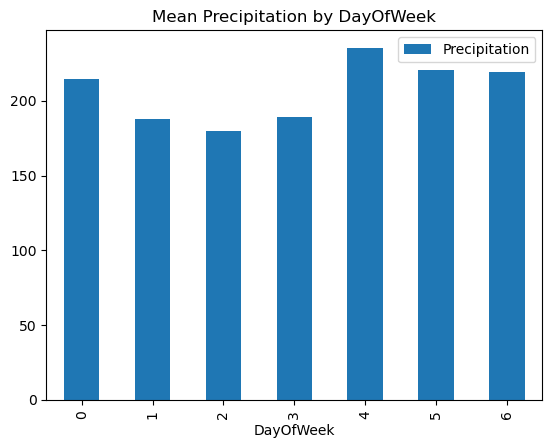

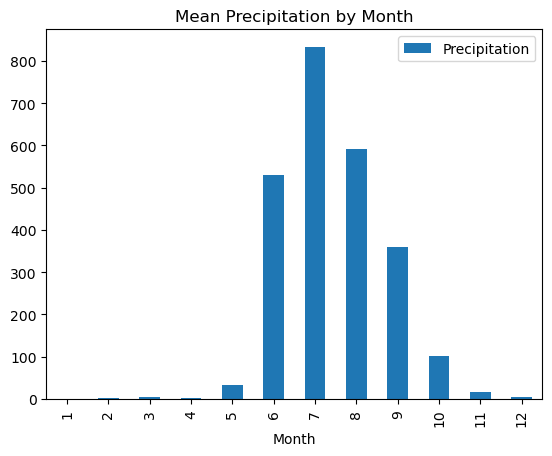

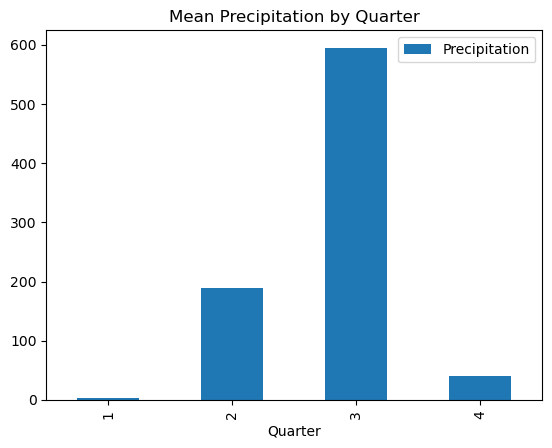

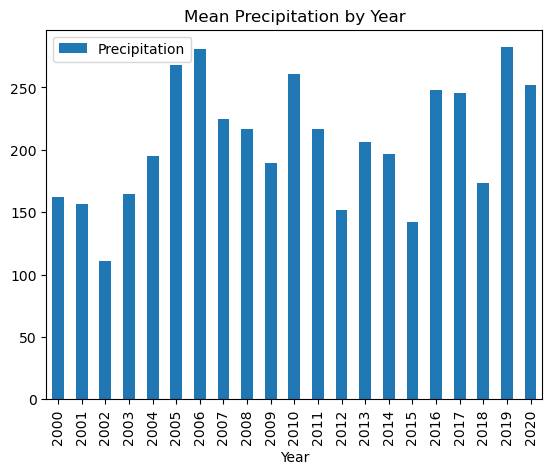

In [11]:
# EDA
cat_cols = ['DayOfWeek', 'Month', 'Quarter', 'Year']

for col in cat_cols:
    df[['Precipitation', col]].groupby(col).mean().plot.bar()
    plt.title(f'Mean Precipitation by {col}')
    plt.show()

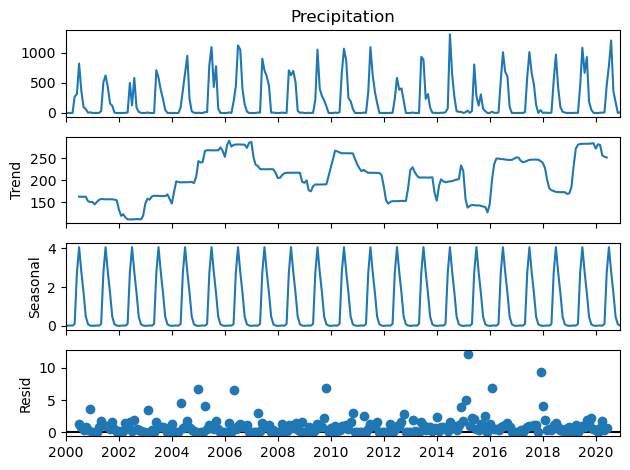

In [14]:
# Seasonal decomposition
ts = df.set_index('Date')['Precipitation'] + 0.01  # Add a small constant
result = seasonal_decompose(ts, model='multiplicative', period=12)
result.plot()
plt.show()

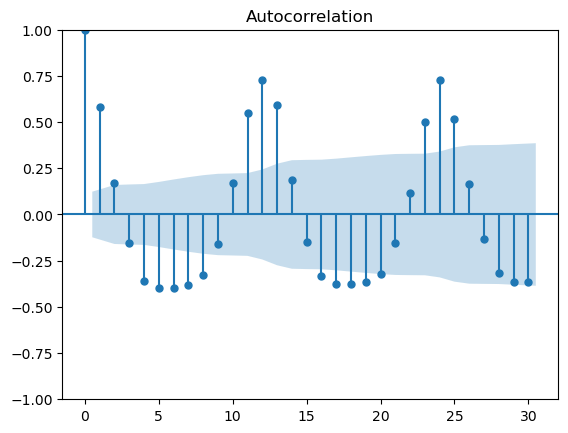

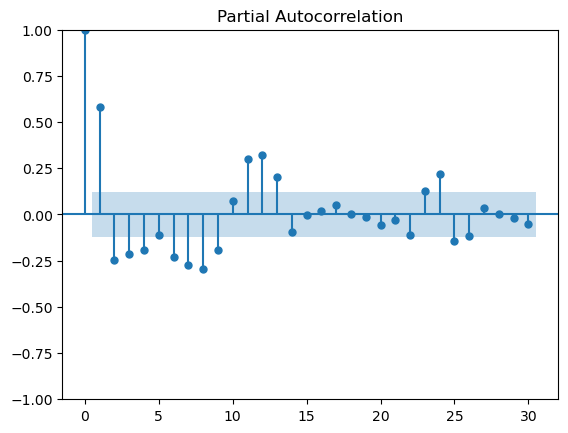

In [35]:
# Autocorrelation and Partial Autocorrelation
plot_acf(ts, lags=30)
plot_pacf(ts, lags=30)
plt.show()

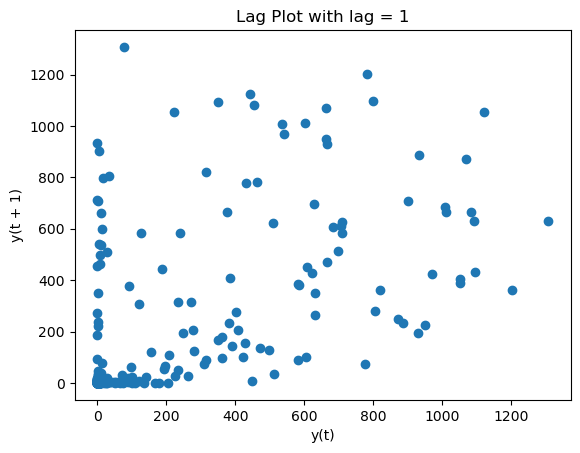

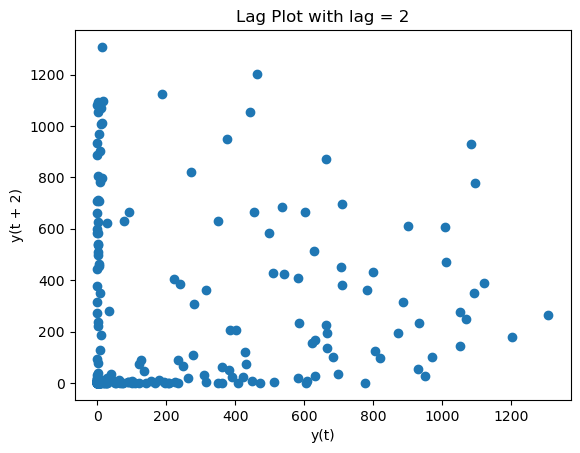

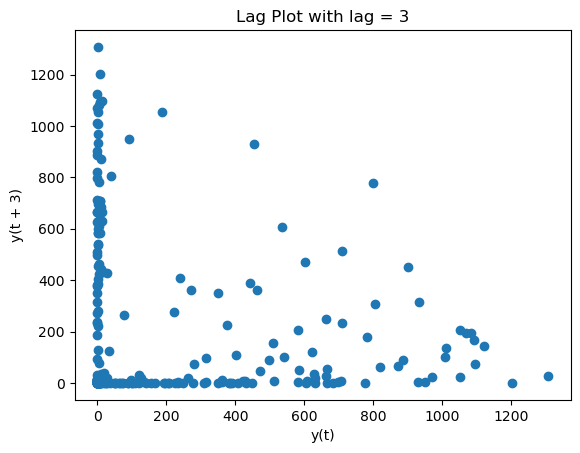

In [37]:
# Lag Plots
for i in range(1, 4):
    pd.plotting.lag_plot(ts, lag=i)
    plt.title(f'Lag Plot with lag = {i}')
    plt.show()

In [48]:
# Stationarity check - stochastic process whose unconditional joint probability distribution does not change when shifted in time
# The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a unit root is present in a time series dataset. 
# A unit root indicates that a time series is non-stationary, meaning it exhibits a trend or some form of dependence between observations.
adf_result = adfuller(ts)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -2.4663249017732647
p-value: 0.12388427626757986


The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is less than any of the critical values.

Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

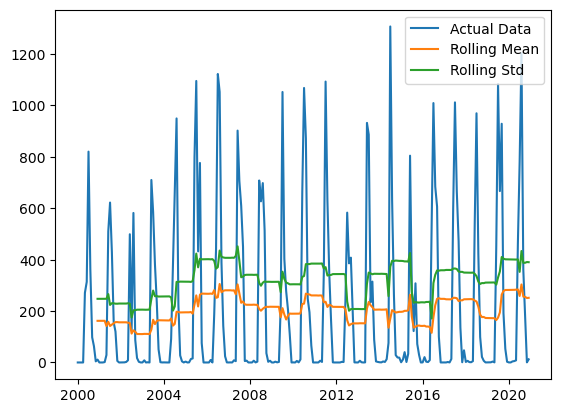

In [21]:
# Rolling and Aggregations
rolling_mean = ts.rolling(window=12).mean()
rolling_std = ts.rolling(window=12).std()

plt.plot(ts, label='Actual Data')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()

In [22]:
# Combine 'Year' and 'Month' columns to create a 'Date' column
df['Date'] = pd.to_datetime(df['Year'].astype(str) +\
                            '-' + df['Month'].astype(str) +\
                            '-' + df['Day'].astype(str),
                            format='%Y-%m-%d')
df.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation,Date,DayOfWeek,Quarter
0,2000,1,1,8.06,48.25,23.93,0.00,2000-01-01,5,1
1,2000,2,1,8.73,50.81,25.83,0.11,2000-02-01,1,1
2,2000,3,1,8.48,42.88,26.68,0.01,2000-03-01,2,1
3,2000,4,1,13.79,55.69,22.49,0.02,2000-04-01,5,2
4,2000,5,1,17.40,70.88,19.07,271.14,2000-05-01,0,2


In [23]:
ts = df.set_index('Date')['Precipitation']
ts

Date
2000-01-01       0.00
2000-02-01       0.11
2000-03-01       0.01
2000-04-01       0.02
2000-05-01     271.14
               ...   
2020-08-01    1203.09
2020-09-01     361.30
2020-10-01     180.18
2020-11-01       0.49
2020-12-01      12.23
Name: Precipitation, Length: 252, dtype: float64

In [24]:
# Fit a SARIMA model
# We need to specify the order (p, d, q) and seasonal order (P, D, Q, S)
# Example order and seasonal order values
p, d, q = 1, 1, 1

# For monthly data with a yearly seasonality
P, D, Q, S = 1, 1, 1, 12  

model = sm.tsa.SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

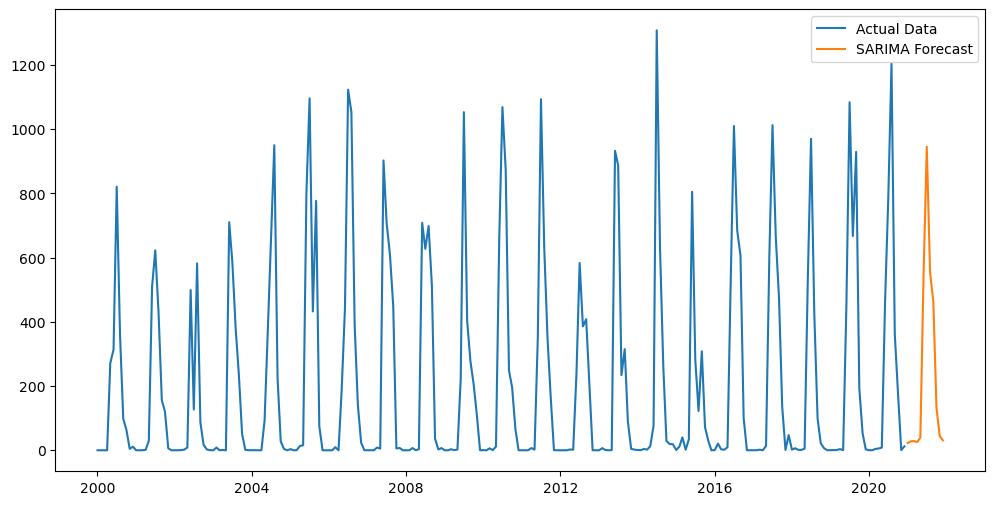

In [25]:
# Make predictions
forecast = results.get_forecast(steps=12)  # Forecast the next 12 periods
forecast_mean = forecast.predicted_mean

# Plot the actual data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Actual Data')
plt.plot(forecast_mean, label='SARIMA Forecast')
plt.legend()
plt.show()